#### Script that evalueates the synthetic profiles for the 4 types of profiles present

In [19]:
import pandas as pd
import numpy as np
import os
import glob
import random
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.metrics import mean_squared_error
import pickle
import scipy.stats
from scipy.stats import *

from support import *
from features.feature_ts import genX
from experiment.algorithms.cluster_prep import *
from Gauss_fit_functions import extractFIT, extractToPs , gauss, straight_line

from synthetic_profiles_functions import *

In [2]:
X = genX([1994,2014],drop_0 = True)

dropping all zero rows


In [3]:
profileIDs = pd.read_pickle('ProfileIDs.pkl') # Read pickle file

## High Season Weekdays a.k.a. Winter Weekdays


In [4]:
# Collect only winter weekday profiles from dataset
df = X.copy()

df.reset_index(inplace = True)

# Extract Season
df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_winter = df[df['season'] == 'winter'] # Create dataframe with all the winter months, excluding weekends

# Extract Weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']
df_winter['day_names'] = df_winter.date.dt.day_name()
df_winter['daytype'] = df_winter.day_names.where(~df_winter.day_names.isin(weekdays), 'weekday')
df_winter.drop(['day_names'], axis = 1, inplace = True)
df_winter_weekdays  = df_winter[df_winter['daytype'] == 'weekday'] # Create dataframe with only weekdays
df_winter_weekdays.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_winter_weekdays =  df_winter_weekdays[df_winter_weekdays.ProfileID.isin(profileIDs)]
# df_winter_weekdays.set_index(['ProfileID','date'], inplace=True)

# High Season Weekends a.k.a. Winter Weekends

In [5]:
# Collect only winter weekday profiles from dataset
df = X.copy()

df.reset_index(inplace = True)

# Extract Season
df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_winter = df[df['season'] == 'winter'] # Create dataframe with all the winter months, excluding weekends


# Extract Weekdays
weekends = ['Sunday', 'Saturday']
df_winter['day_names'] = df_winter.date.dt.day_name()
df_winter['daytype'] = df_winter.day_names.where(~df_winter.day_names.isin(weekends), 'weekend')
df_winter.drop(['day_names'], axis = 1, inplace = True)
df_winter_weekend  = df_winter[df_winter['daytype'] == 'weekend'] # Create dataframe with only weekdays
df_winter_weekend.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_winter_weekend = df_winter_weekend[df_winter_weekend.ProfileID.isin(profileIDs)]

## Low Season Weekday a.k.a. Not Winter Weekday

In [6]:
# Collect only winter weekday profiles from dataset
df = X.copy()

df.reset_index(inplace = True)

# Extract Season
df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_summer = df[df['season'] == 'summer'] # Create dataframe with all the winter months, excluding weekends


# Extract Weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']
weekends = ['Sunday', 'Saturday']
df_summer['day_names'] = df_summer.date.dt.day_name()
df_summer['daytype'] = df_summer.day_names.where(~df_summer.day_names.isin(weekdays), 'weekday')
df_summer.drop(['day_names'], axis = 1, inplace = True)
df_summer_weekday  = df_summer[df_summer['daytype'] == 'weekday'] # Create dataframe with only weekdays
df_summer_weekday.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_summer_weekday = df_summer_weekday[df_summer_weekday.ProfileID.isin(profileIDs)]

## Low Season Weekend a.k.a. Not Winter Weekend

In [7]:
# Collect only winter weekday profiles from dataset
df = X.copy()

df.reset_index(inplace = True)

# Extract Season
df['month'] = df.date.dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [6, 7, 8] else 'summer') 
df_summer = df[df['season'] == 'summer'] # Create dataframe with all the winter months, excluding weekends


# Extract Weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']
weekends = ['Sunday', 'Saturday']
df_summer['day_names'] = df_summer.date.dt.day_name()
df_summer['daytype'] = df_summer.day_names.where(~df_summer.day_names.isin(weekends), 'weekend')
df_summer.drop(['day_names'], axis = 1, inplace = True)
df_summer_weekends  = df_summer[df_summer['daytype'] == 'weekend'] # Create dataframe with only weekdays
df_summer_weekends.drop(['month', 'season','daytype'], axis = 1, inplace = True)
df_summer_weekends = df_summer_weekends[df_summer_weekends.ProfileID.isin(profileIDs)]

# Load The Gauss Fit Features

## High Season Weekdays

In [8]:
season = "Low_season_weekdays" #HighSeason_weekdays, Low_season_weekdays, Low_season_weekends, High_season_weekends


if season == "Low_season_weekdays":
    cleaned_df = df_summer_weekday.copy()

elif season == "Low_season_weekends":
    cleaned_df = df_summer_weekends.copy()

elif season == "HighSeason_weekdays":
    cleaned_df = df_winter_weekdays.copy()
    
elif season == "High_season_weekends":
    cleaned_df = df_winter_weekend.copy()


gaus_fit_features = pd.read_csv('FitFeatures_' + season + '.csv')
gauss_profileIds = gaus_fit_features['ProfileID'].unique()
cleaned_df_profile_ids = cleaned_df['ProfileID'].unique()

profileIDs_2 = np.intersect1d(gauss_profileIds, cleaned_df_profile_ids)

cleaned_df = cleaned_df.loc[cleaned_df.ProfileID.isin(profileIDs_2),:]
gauss_fit_features = gaus_fit_features.loc[gaus_fit_features.ProfileID.isin(profileIDs_2),:]

In [9]:
gauss_fit_features

,ProfileID,H_offset,sigma1,sigma2,mu1,A1,sigma3,sigma4,mu2,A2
0,1,1.367766,0.789474,1.081081,6,1.462866,2.051282,1.428571,20,1.727244
1,3,2.865210,1.333333,0.819672,7,3.496245,1.333333,2.051282,20,4.576910
2,5,1.990001,1.176471,2.758621,7,6.018778,2.857143,1.034483,21,6.546335
3,6,1.523638,1.470588,2.272727,8,4.403138,1.578947,2.181818,18,4.266434
4,10,1.468264,1.518987,1.052632,6,2.931721,2.222222,2.857143,18,3.036239
...,...,...,...,...,...,...,...,...,...,...
9106,12029019,1.190966,0.550459,1.538462,6,2.857009,2.352941,2.380952,19,3.642056
9107,12029023,0.868380,0.575540,1.132075,5,8.017757,3.414634,1.449275,19,6.543146
9108,12029027,1.536760,2.222222,1.904762,8,2.994393,2.051282,2.000000,18,10.434579
9109,12029032,3.353115,2.439024,2.500000,8,5.191277,2.380952,2.307692,17,6.797508


## Extract the Amplitudes from the measured profiles

In [10]:
# Create cols
cols = ['ProfileID','A1','A2','mu1','mu2']

# Create dummy variables
mu1 = 0
A1 = 0 
mu2 = 0
A2 = 0

data=[['DROP_ROW',A1,A2,mu1,mu2]]

amplitudes_df = pd.DataFrame(data, columns=cols)

profileIDs_3 = gauss_fit_features['ProfileID'].unique()

for id in tqdm(profileIDs_3):
    for index in cleaned_df[cleaned_df['ProfileID'] == id].index:
        A1, A2, mu1, mu2, check = extractToPs(cleaned_df[cleaned_df['ProfileID'] == id].loc[index])
        if check == False:
            continue
        
        data=[[id,A1,A2,mu1,mu2]]
        temp_df = pd.DataFrame(data, columns=cols)
        # temp_df.set_index(['ProfileID'])
        amplitudes_df = amplitudes_df.append(temp_df)
    
amplitudes_df = amplitudes_df.set_index(['ProfileID'])
temporary = amplitudes_df.copy()
temporary.drop(['DROP_ROW'],axis = 0, inplace = True)

  0%|          | 0/9111 [00:00<?, ?it/s]

# Save the amplitudes of the measured profiles to a csv file

In [11]:
temporary.to_csv("Low_Season_weekdays_amplitudes.csv")

In [12]:
def standard_deviation(my_list):
    #calculate population standard deviation of list 
    return (sum((x-(sum(my_list) / len(my_list)))**2 for x in my_list) / len(my_list))**0.5

In [16]:
daily_consumption = pd.DataFrame()

daily_consumption['Daily_Consumption'] = cleaned_df.set_index(["ProfileID"]).sum(axis = 1)

std_deviation_df = pd.DataFrame(index = temporary.index.unique())

for id in tqdm(temporary.index.unique()):
    try:
        std_deviation_df.loc[id,'A1_std'] = standard_deviation(temporary.loc[id]['A1'])
        std_deviation_df.loc[id,'A2_std'] = standard_deviation(temporary.loc[id]['A2'])
        std_deviation_df.loc[id,'mu1_std'] = standard_deviation(temporary.loc[id]['mu1'])
        std_deviation_df.loc[id,'mu2_std'] = standard_deviation(temporary.loc[id]['mu2'])
        std_deviation_df.loc[id,'DC_std'] = standard_deviation(daily_consumption.loc[id]['Daily_Consumption'])
    except TypeError:
        print('TypeError')
        continue

  0%|          | 0/9111 [00:00<?, ?it/s]

TypeError


In [15]:
temporary.loc[id]['A1']

0.5333333338300387

In [17]:
gauss_fit_features.set_index(['ProfileID'], inplace = True)
combined_df = pd.merge(gauss_fit_features,std_deviation_df, left_index = True, right_index = True)

## Loop that extracts the distributions fitted to user profiles measured peaks

In [20]:
profiles_ids = combined_df.index.unique().values

cols = pd.MultiIndex.from_tuples([#("ProfileID",''),
                                ('A1', 'Distribution'),
                                 ("A1", "chi_square"), 
                                  ("A1", "params"), 
                                  ("A2", "Distribution"),
                                  ("A2", "chi_square"),
                                  ("A2", "params") 
                                  #, ('t1', 'Distribution'),
                                  # ("t1", "chi_square"), 
                                  # ("t1", "params"), 
                                  # ("t2", "Distribution"),
                                  # ("t2", "chi_square"),
                                  # ("t2", "params"),
                                ])
distributions_df = pd.DataFrame(index = profiles_ids,columns = cols)
results = []
for id in tqdm(profiles_ids):
    # Extract the best distribution fitted
    try:
      results1 = fit_distribution(temporary.loc[id],'A1',0.99,0.01)
      results2 = fit_distribution(temporary.loc[id],'A2',0.99,0.01)
      # results3 = fit_distribution(temporary.loc[id],'mu1',0.99,0.01)
      # results4 = fit_distribution(temporary.loc[id],'mu2',0.99,0.01)

      results = [results1.values[0],results1.values[1],results1.values[2], results2.values[0],results2.values[1],results2.values[2]]
                # ,results3.values[0],results3.values[1],results3.values[2], results4.values[0],results4.values[1],results4.values[2]]

      distributions_df.loc[id] = results
    except Exception:
      continue

  0%|          | 0/9111 [00:00<?, ?it/s]

In [23]:
distributions_df.to_csv('Low_Season_Weekday_Distributions.csv')

# Loop that generates the synthetic peaks from the fitted distributions

In [24]:
level_0 = distributions_df.columns.get_level_values(0).unique()
inv_data_df = pd.DataFrame()
temp_df_inv = pd.DataFrame()
for houseID in tqdm(distributions_df.index):
    for column in level_0:

        distributions = distributions_df[column].loc[houseID]['Distribution']
        parameters = distributions_df[column].loc[houseID]['params']

        loc = combined_df.loc[houseID][column] + combined_df.loc[houseID]['H_offset']
        scale = combined_df.loc[houseID][column + '_std']  
        # loc = parameters[-2]
        # scale = parameters[-1]
        size = len(cleaned_df[cleaned_df['ProfileID'] == houseID])

        if distributions == 'invgauss':
            print('invgauss')
            data_points = invgauss.rvs(parameters[0],loc = loc,scale = scale,size = size)
        elif distributions == 'weibull_min':
            print('weibull_min')
            data_points = weibull_min.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'weibull_max':
            print('weibull_max')
            print(f'loc = {loc}, scale = {scale}')
            data_points = weibull_max.rvs(parameters[0], loc = loc, scale = scale, size = size)
            # data_points = weibull_max.rvs(parameters[0], parameters[1], parameters[2], size = 60)
        elif distributions == 'beta':
            print('beta')
            data_points = beta.rvs(parameters[0], parameters[1], loc = loc,scale = scale, size = size)
            # data_points = beta.rvs(parameters[0], parameters[1], parameters[2],parameters[3], size = 60)
        elif distributions == 'norm':
            print('norm')
            data_points = norm.rvs(parameters[0], parameters[1], size = size)
        elif distributions == 'triang':
            print('triang')
            data_points = triang.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'pearson3':
            print('pearson3')
            data_points = pearson3.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'lognorm':
            print('lognorm')
            data_points = lognorm.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'uniform':
            print('uniform')
            data_points = uniform.rvs(loc = loc,scale = scale, size = size)
        elif distributions == 'expon':
            print('expon')
            data_points = expon.rvs(loc = loc,scale = scale, size = size)
        elif distributions == 'gamma':
            print('gamma')
            data_points = gamma.rvs(parameters[0], loc = loc,scale = scale, size = size)
        elif distributions == 'alpha':
            print('alpha')
            data_points = alpha.rvs(parameters[0], loc=loc, scale = scale,size=size)
        elif distributions == 'arcsine':
            print('arcsine')
            data_points = arcsine.rvs(loc=loc, scale = scale,size=size)
        elif distributions == 'cauchy':
            print('cauchy')
            data_points = cauchy.rvs(loc=loc, scale = scale,size=size)
        elif distributions == 'dweibull':
            print('dweibull')
            data_points = dweibull.rvs(parameters[0], loc=loc, scale = scale,size=size)
        elif distributions == 'exponnorm':
            print('exponnorm')
            data_points = exponnorm.rvs(K=1.5, loc=loc, scale = scale,size=size)
        elif distributions == 'halflogistic':
            print('halflogistic')
            data_points = halflogistic.rvs(loc=loc, scale = scale,size=size)
        elif distributions == 'logistic':
            print('logistic')
            data_points = logistic.rvs(loc=loc, scale = scale,size=size)
        elif distributions == 'loggamma':
            print('loggamma')
            data_points = loggamma.rvs(parameters[0], loc=loc, scale = scale,size=size)
        elif distributions == 'powerlaw':
            print('powerlaw')
            data_points = powerlaw.rvs(parameters[0], loc=loc, scale = scale,size=size)
        elif distributions == 'powernorm':
            print('powernorm')
            data_points = powernorm.rvs(parameters[0], loc=loc, scale = scale,size=size)
        

        # print(column)
        # inverse_data_points = inverse_StandardScalar(data_points,temporary.loc[id],column,0.99,0.01)
        temp_df_inv['ProfileID'] = houseID
        temp_df_inv[column] = data_points#inverse_data_points
        
    inv_data_df = inv_data_df.append(temp_df_inv)
    temp_df_inv = pd.DataFrame()
        # if column == 'A1':
        #     data_pointA1 = data_points#inverse_data_points
        # elif column == 'A2':
        #     data_pointsA2 = data_points#inverse_data_points

inv_data_df = inv_data_df.dropna()
inv_data_df.set_index(['ProfileID'], inplace = True)

  0%|          | 0/9111 [00:00<?, ?it/s]

halflogistic
weibull_min
weibull_min
invgauss
invgauss
gamma
weibull_min
weibull_min
invgauss
invgauss
invgauss
invgauss
weibull_min
invgauss
halflogistic
lognorm
invgauss
weibull_min
weibull_min
weibull_min
invgauss
lognorm
invgauss
weibull_min
lognorm
lognorm
lognorm
invgauss
lognorm
invgauss
invgauss
weibull_min
lognorm
weibull_min
weibull_min
weibull_min
weibull_min
lognorm
invgauss
lognorm
lognorm
invgauss
invgauss
lognorm
invgauss
gamma
invgauss
invgauss
invgauss
invgauss
lognorm
invgauss
invgauss
invgauss
lognorm
lognorm
weibull_min
weibull_min
invgauss
gamma
invgauss
lognorm
weibull_min
weibull_min
lognorm
halflogistic
gamma
lognorm
halflogistic
invgauss
gamma
lognorm
weibull_min
invgauss
weibull_min
halflogistic
gamma
invgauss
invgauss
invgauss
halflogistic
weibull_min
invgauss
weibull_min
lognorm
lognorm
invgauss
weibull_min
lognorm
weibull_min
invgauss
weibull_min
lognorm
lognorm
weibull_min
invgauss
invgauss
weibull_min
weibull_min
invgauss
weibull_min
invgauss
invgauss
inv

# Loop That creates the synthetic Profiles

In [25]:

# Function that generates synthetic profiles
def generate_synth_profiles1(id,A1,A2,mu1,mu2, H_offset, sigma1, sigma2, sigma3, sigma4):    
    # Straight line approximation between: mu1 + 4 to mu2 - 4
    # Determine the complete synthetic profile
    
    i = 0
    temp = pd.DataFrame()
    for A1_item, A2_item in zip(A1.A1.iteritems(), A2.A2.iteritems()):
        integer = 3
        x_1 = np.arange(0,mu1,1)
        x_2 = np.arange(mu1,mu1+integer,1)
        x_3 = np.arange(mu2-integer,mu2,1)
        x_4 = np.arange(mu2,24,1)

        x_vals = np.hstack((x_1,x_2,x_3,x_4))

        if len(x_vals) > 24:
            integer = integer - 1
            x_1 = np.arange(0,mu1,1)
            x_2 = np.arange(mu1,mu1+integer,1)
            x_3 = np.arange(mu2-integer,mu2,1)
            x_4 = np.arange(mu2,24,1)
            x_vals = np.hstack((x_1,x_2,x_3,x_4))
        # print(f"integer == {integer}")    

        x_vals_1 = np.unique(x_vals)
        # if id == 3268:
        # print(f"mu1 = {mu1}")
        # print(f"mu2 = {mu2}")
        # print(f"x_1 = {x_1}, x2 = {x_2}, x_3 = {x_3}, x4 = {x_4}")
        # print(f"x_vals = {x_vals_1}")
        # synthetic_df2 = pd.DataFrame()
        
        i = i + 1
        gauss1 = gauss(x_1, H_offset ,A1_item[1], mu1, sigma1)
        gauss2 = gauss(x_2, H_offset ,A1_item[1], mu1, sigma2)
        gauss3 = gauss(x_3, H_offset ,A2_item[1], mu2, sigma3)
        gauss4 = gauss(x_4, H_offset ,A2_item[1], mu2, sigma4)
        # print(A1_item[1])
        # if id == 3268:
        # print(f'len(gauss1) = {len(gauss1)}')
        # print(f'len(gauss2) = {len(gauss2)}')
        # print(f'len(gauss3) = {len(gauss3)}')
        # print(f'len(gauss4) = {len(gauss4)}')
        i2 = mu1 + integer
        i3 = mu2 - integer
        # print(f"i2 = {i2}, i3 = {i3}")
        if len(x_vals) == 24:
                # print("Entire array is captured")
                if x_2[-1] == x_3[0]:
                    x_3 = x_3[1:] # Remove the first value of the x-array
                    y3 = gauss(x_3, H_offset,A2_item[1],mu2,sigma3) # Re-calculate the y-values for gauss 3
                    synth = np.hstack((gauss1,gauss2,gauss3,gauss4)) # Generate the synthetic values
                else:
                    synth = np.hstack((gauss1,gauss2,gauss3,gauss4)) # If there is no repeating values in x_2 and x_3 then generate synthetic profiles without adjusting x_3's values

        elif len(x_vals) < 24:
            # print("Missing hours need to be saved")
            x_5 = np.arange(i2,i3,1)
            x_vals_1 = np.hstack((x_1,x_2,x_5,x_3,x_4))
            x_vals_1 = np.unique(x_vals_1)
            if len(x_5) == 1:
                y_mid = np.abs(gauss(x_5[0], H_offset,A1_item[1],mu1,sigma2) - gauss(x_5[0], H_offset,A2_item[1],mu2,sigma3))/2

            else:    
                # Synthesize the mid range behaviour
                m = (gauss(x_5[-1], H_offset,A2_item[1],mu2,sigma3) - gauss(x_5[0], H_offset,A1_item[1],mu1,sigma2))/(x_5[-1]-x_5[0]) # Calculate slope
                b = gauss(x_5[-1], H_offset,A2_item[1],mu2,sigma3) - m*x_5[-1] # Calculate b constant for straight line equation
                y_mid = straight_line(m,x_5,b)
                
            synth = np.hstack((gauss1,gauss2,y_mid,gauss3,gauss4))
            # if id == 3268:

        elif len(x_vals) > 24:    
            if x_2[-1] == x_3[0]:
                x_3 = x_3[1:] # Remove the first value of the x-array
                y3 = gauss(x_3, H_offset,A2_item[1],mu2,sigma3) # Re-calculate the y-values for gauss 3
                synth = np.hstack((gauss1,gauss2,gauss3,gauss4)) # Generate the synthetic values
                # print(x_3)
            else:
                synth = np.hstack((gauss1,gauss2,gauss3,gauss4)) # If there is no repeating values in x_2 and x_3 then generate synthetic profiles without adjusting x_3's values


        values = synth.tolist()
        df = pd.DataFrame(values)
        df = df.T
        temp = temp.append(df)


    temp['ProfileID'] = id
    temp.set_index(['ProfileID'], inplace = True)        

    return temp

In [26]:
synthetic_df = pd.DataFrame()
for id in tqdm(distributions_df.index.unique()):
    houseID = id

    H_offset = combined_df.loc[houseID]['H_offset']
    # H_offset = 0.0
    mu1 = combined_df.loc[houseID]['mu1']
    mu2 = combined_df.loc[houseID]['mu2']

    sigma1 = combined_df.loc[houseID]['sigma1']
    sigma2 = combined_df.loc[houseID]['sigma2']
    sigma3 = combined_df.loc[houseID]['sigma3']
    sigma4 = combined_df.loc[houseID]['sigma4']

    A1 = inv_data_df.loc[houseID]['A1']
    A2 = inv_data_df.loc[houseID]['A2']
    A1 = pd.DataFrame(A1)
    A2 = pd.DataFrame(A2)
    A1 = A1 - H_offset
    A2 = A2 - H_offset

    A1.reset_index(inplace=True)
    A2.reset_index(inplace=True)


    synth = generate_synth_profiles1(houseID,A1,A2,mu1,mu2,H_offset,sigma1,sigma2, sigma3,sigma4)

    # temp = pd.DataFrame(synth)
    # temp = temp.T
    synthetic_df = synthetic_df.append(synth)
    synthetic_df

  0%|          | 0/9111 [00:00<?, ?it/s]

In [29]:
synthetic_df_temp = synthetic_df.reset_index()
synthetic_df_mean = synthetic_df_temp.groupby(['ProfileID']).mean()
# synthetic_df_mean.drop(synthetic_df_mean.columns[[-1]], axis = 1, inplace = True)

In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [32]:
cols = ['ProfileID','RMSE', 'sMAPE', 'MAPE']

errors = pd.DataFrame(columns = cols)

for houseID in tqdm(synthetic_df_mean.index):

    # Measured Mean profile
    actual = cleaned_df[cleaned_df["ProfileID"] == houseID]
    actual = actual.groupby(['ProfileID']).mean().values[0]

    # predicted = synthetic_df_temp[synthetic_df_temp['ProfileID'] == houseID]
    predicted = synthetic_df_mean.loc[houseID]

    MSE = mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)
    MAPE = mean_absolute_percentage_error(actual, predicted)
    sMAPE = smape(actual, predicted)

    data = [[houseID, RMSE,sMAPE,MAPE]]
    temp = pd.DataFrame(data, columns = cols)
    errors = errors.append(temp)

errors.set_index(['ProfileID'], inplace = True)
# errors.to_csv('Errors_of_synth_vs_actual.csv')

  0%|          | 0/9111 [00:00<?, ?it/s]

In [33]:
# Filter out all households with an sMAPE higher than 35%
profile_ids_good_fit = errors[errors['sMAPE'] < 35.0].index.values

# Plot Distributions of the Peaks

### First filter out any outliers

In [34]:
synthetic_peaks_filtered = inv_data_df.loc[inv_data_df.index.isin(profile_ids_good_fit),:]
synthetic_peaks_filtered.reset_index(inplace = True)
''' Detection '''
# IQR
Q1 = np.percentile(synthetic_peaks_filtered['A1'], 0,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(synthetic_peaks_filtered['A1'], 90,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", synthetic_peaks_filtered.shape)
 
# Upper bound
upper = np.where(synthetic_peaks_filtered['A1'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(synthetic_peaks_filtered['A1'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
synthetic_peaks_filtered.drop(upper[0], inplace = True)
synthetic_peaks_filtered.drop(lower[0], inplace = True)
 
print("New Shape: ", synthetic_peaks_filtered.shape)

Old Shape:  (716169, 3)
New Shape:  (714178, 3)


## Plot distribution of peaks

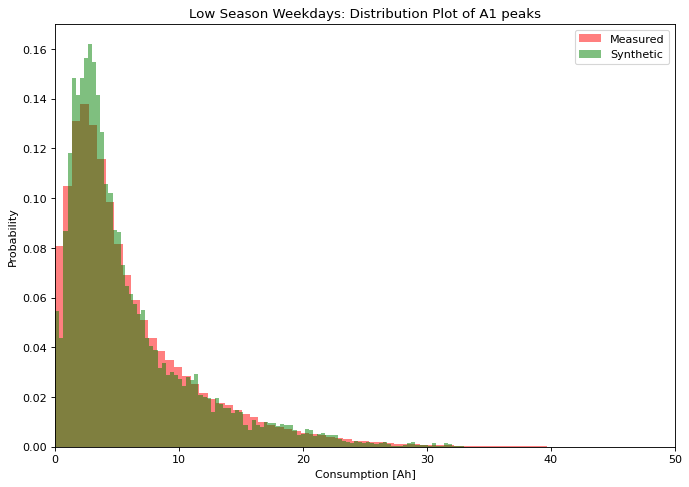

In [36]:
measured_peaks_filtered = temporary.loc[temporary.index.isin(synthetic_peaks_filtered.ProfileID.unique()),:]
# synthetic_peaks_filtered = inv_data_df.loc[inv_data_df.index.isin(profile_ids_good_fit),:]

act_A1 = measured_peaks_filtered['A1']
# act_A2 = measured_peaks_filtered['A2']
synth_A1 = synthetic_peaks_filtered['A1']
# synth_A2 = synthetic_peaks_filtered['A2']

# Normalize
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

# Plot
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(act_A1, **kwargs, color='r', label='Measured')
plt.hist(synth_A1, **kwargs, color='g', label='Synthetic')
# plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Low Season Weekdays: Distribution Plot of A1 peaks', ylabel='Probability')
plt.xlabel('Consumption [Ah]')
plt.xlim(0,50)
plt.legend();

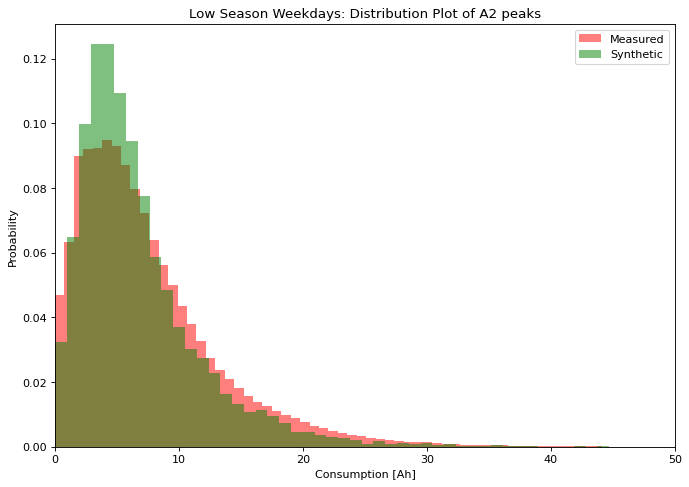

In [53]:
# act_A1 = measured_peaks_filtered['A1']
act_A2 = measured_peaks_filtered['A2']
# synth_A1 = synthetic_peaks_filtered['A1']
synth_A2 = synthetic_peaks_filtered['A2']

# Normalize
kwargs1 = dict(alpha=0.5, bins=100, density=True, stacked=True)
kwargs2 = dict(alpha=0.5, bins=1000, density=True, stacked=True)

# Plot
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(act_A2, **kwargs1, color='r', label='Measured')
plt.hist(synth_A2, **kwargs2, color='g', label='Synthetic')
# plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Low Season Weekdays: Distribution Plot of A2 peaks', ylabel='Probability')
plt.xlabel('Consumption [Ah]')
plt.xlim(0,50)
plt.legend();

### Plot Daily Consumption Distribution

In [54]:
daily_energy_synth = synthetic_df.sum(axis = 1)
daily_energy_synth = pd.DataFrame(daily_energy_synth, columns = ['Daily Energy'])
daily_energy_synth.reset_index(inplace = True)

# IQR
Q1 = np.percentile(daily_energy_synth['Daily Energy'], 0,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(daily_energy_synth['Daily Energy'], 90,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", daily_energy_synth.shape)
 
# Upper bound
upper = np.where(daily_energy_synth['Daily Energy'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(daily_energy_synth['Daily Energy'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
daily_energy_synth.drop(upper[0], inplace = True)
daily_energy_synth.drop(lower[0], inplace = True)
 
print("New Shape: ", daily_energy_synth.shape)

Old Shape:  (1241450, 2)
New Shape:  (1221950, 2)


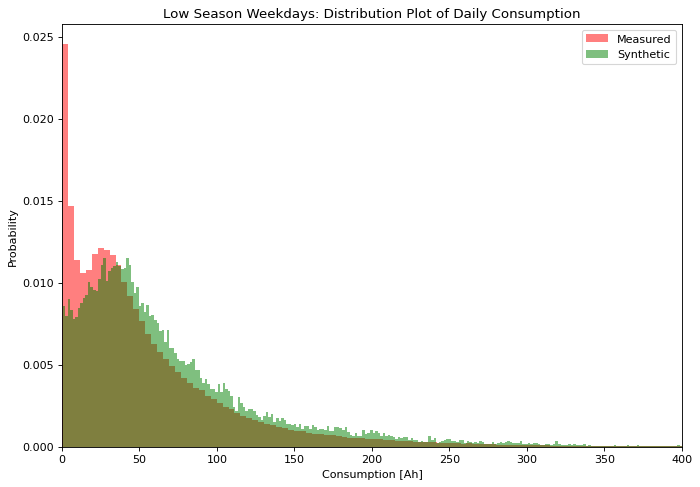

In [56]:
new_df = cleaned_df.copy()
new_df.set_index(['ProfileID','date'], inplace = True)
new_df_sum = new_df.sum(axis = 1)
daily_energy_actual = pd.DataFrame(new_df_sum, columns = ['Daily Energy'])

# daily_energy_synth = synthetic_df.sum(axis = 1)
# daily_energy_synth = pd.DataFrame(daily_energy_synth, columns = ['Daily Energy'])

daily_energy_actual.reset_index(inplace = True)
# daily_energy_synth.reset_index(inplace = True)
daily_energy_synth_filtered = daily_energy_synth#.loc[daily_energy_synth.ProfileID.isin(profile_ids_good_fit),:]
daily_energy_actual_filtered = daily_energy_actual.loc[daily_energy_actual.ProfileID.isin(daily_energy_synth.ProfileID.unique()),:]

x1 = daily_energy_synth_filtered['Daily Energy']#*230/1000
x2 = daily_energy_actual_filtered['Daily Energy']#*230/1000

# Normalize
kwargs = dict(alpha=0.5, bins=250, density=True, stacked=True)

# Plot
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(x2, **kwargs, color='r', label='Measured')
plt.hist(x1, **kwargs, color='g', label='Synthetic')
# plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Low Season Weekdays: Distribution Plot of Daily Consumption', ylabel='Probability')
plt.xlabel('Consumption [Ah]')
plt.xlim(0,400)
plt.legend();

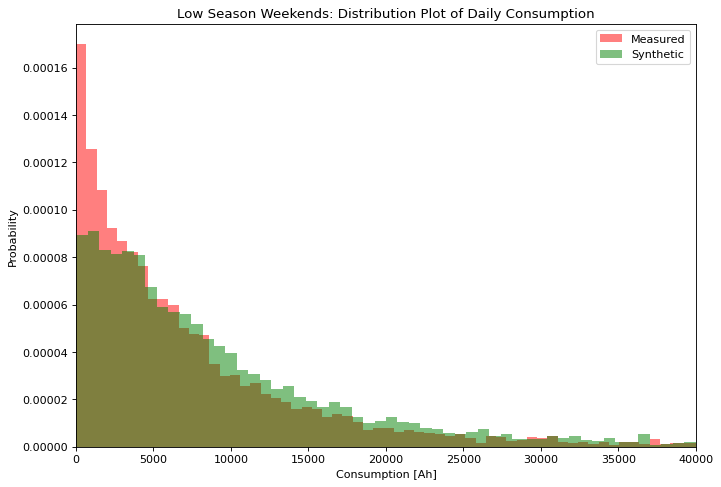

In [62]:
x1 = daily_energy_synth_filtered.groupby(['ProfileID'])['Daily Energy'].sum()#*230/1000
x2 = daily_energy_actual_filtered.groupby(['ProfileID'])['Daily Energy'].sum()#*230/1000

# Normalize
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

# Plot
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(x2, **kwargs, color='r', label='Measured')
plt.hist(x1, **kwargs, color='g', label='Synthetic')
# plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Low Season Weekends: Distribution Plot of Daily Consumption', ylabel='Probability')
plt.xlabel('Consumption [Ah]')
plt.xlim(0,40000)
plt.legend();